Preprocessing and Pipelines
=============================

In [7]:
#from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split
import pickle
import numpy as np
#digits = load_digits()
#X_train, X_test, y_train, y_test = train_test_split(digits.data,
#                                                    digits.target)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [1]:
cle_full_path = "/Users/shermanash/ds/metis/nyc16_ds6/04-mcnulty1/04-svms/cleveland_full_1.csv"
cle_14_path = "/Users/shermanash/ds/metis/nyc16_ds6/04-mcnulty1/04-svms/cleveland_14.csv"
lb_full_path = "/Users/shermanash/ds/metis/nyc16_ds6/04-mcnulty1/04-svms/longbeach_full_1.csv"
lb_14_path = "/Users/shermanash/ds/metis/nyc16_ds6/04-mcnulty1/04-svms/longbeach_14.csv"

In [2]:
import pandas as pd
# load data and split
df = pd.read_csv(cle_14_path)
#cols_we_like = [col for col in df.columns if col not in [['id','location','num','Unnamed: 0']]]
# train test split
#X = df[cols_we_like]
#y = df.num
#X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
df.columns.values

array(['Unnamed: 0', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal',
       'num'], dtype=object)

<IPython.core.display.Javascript object>


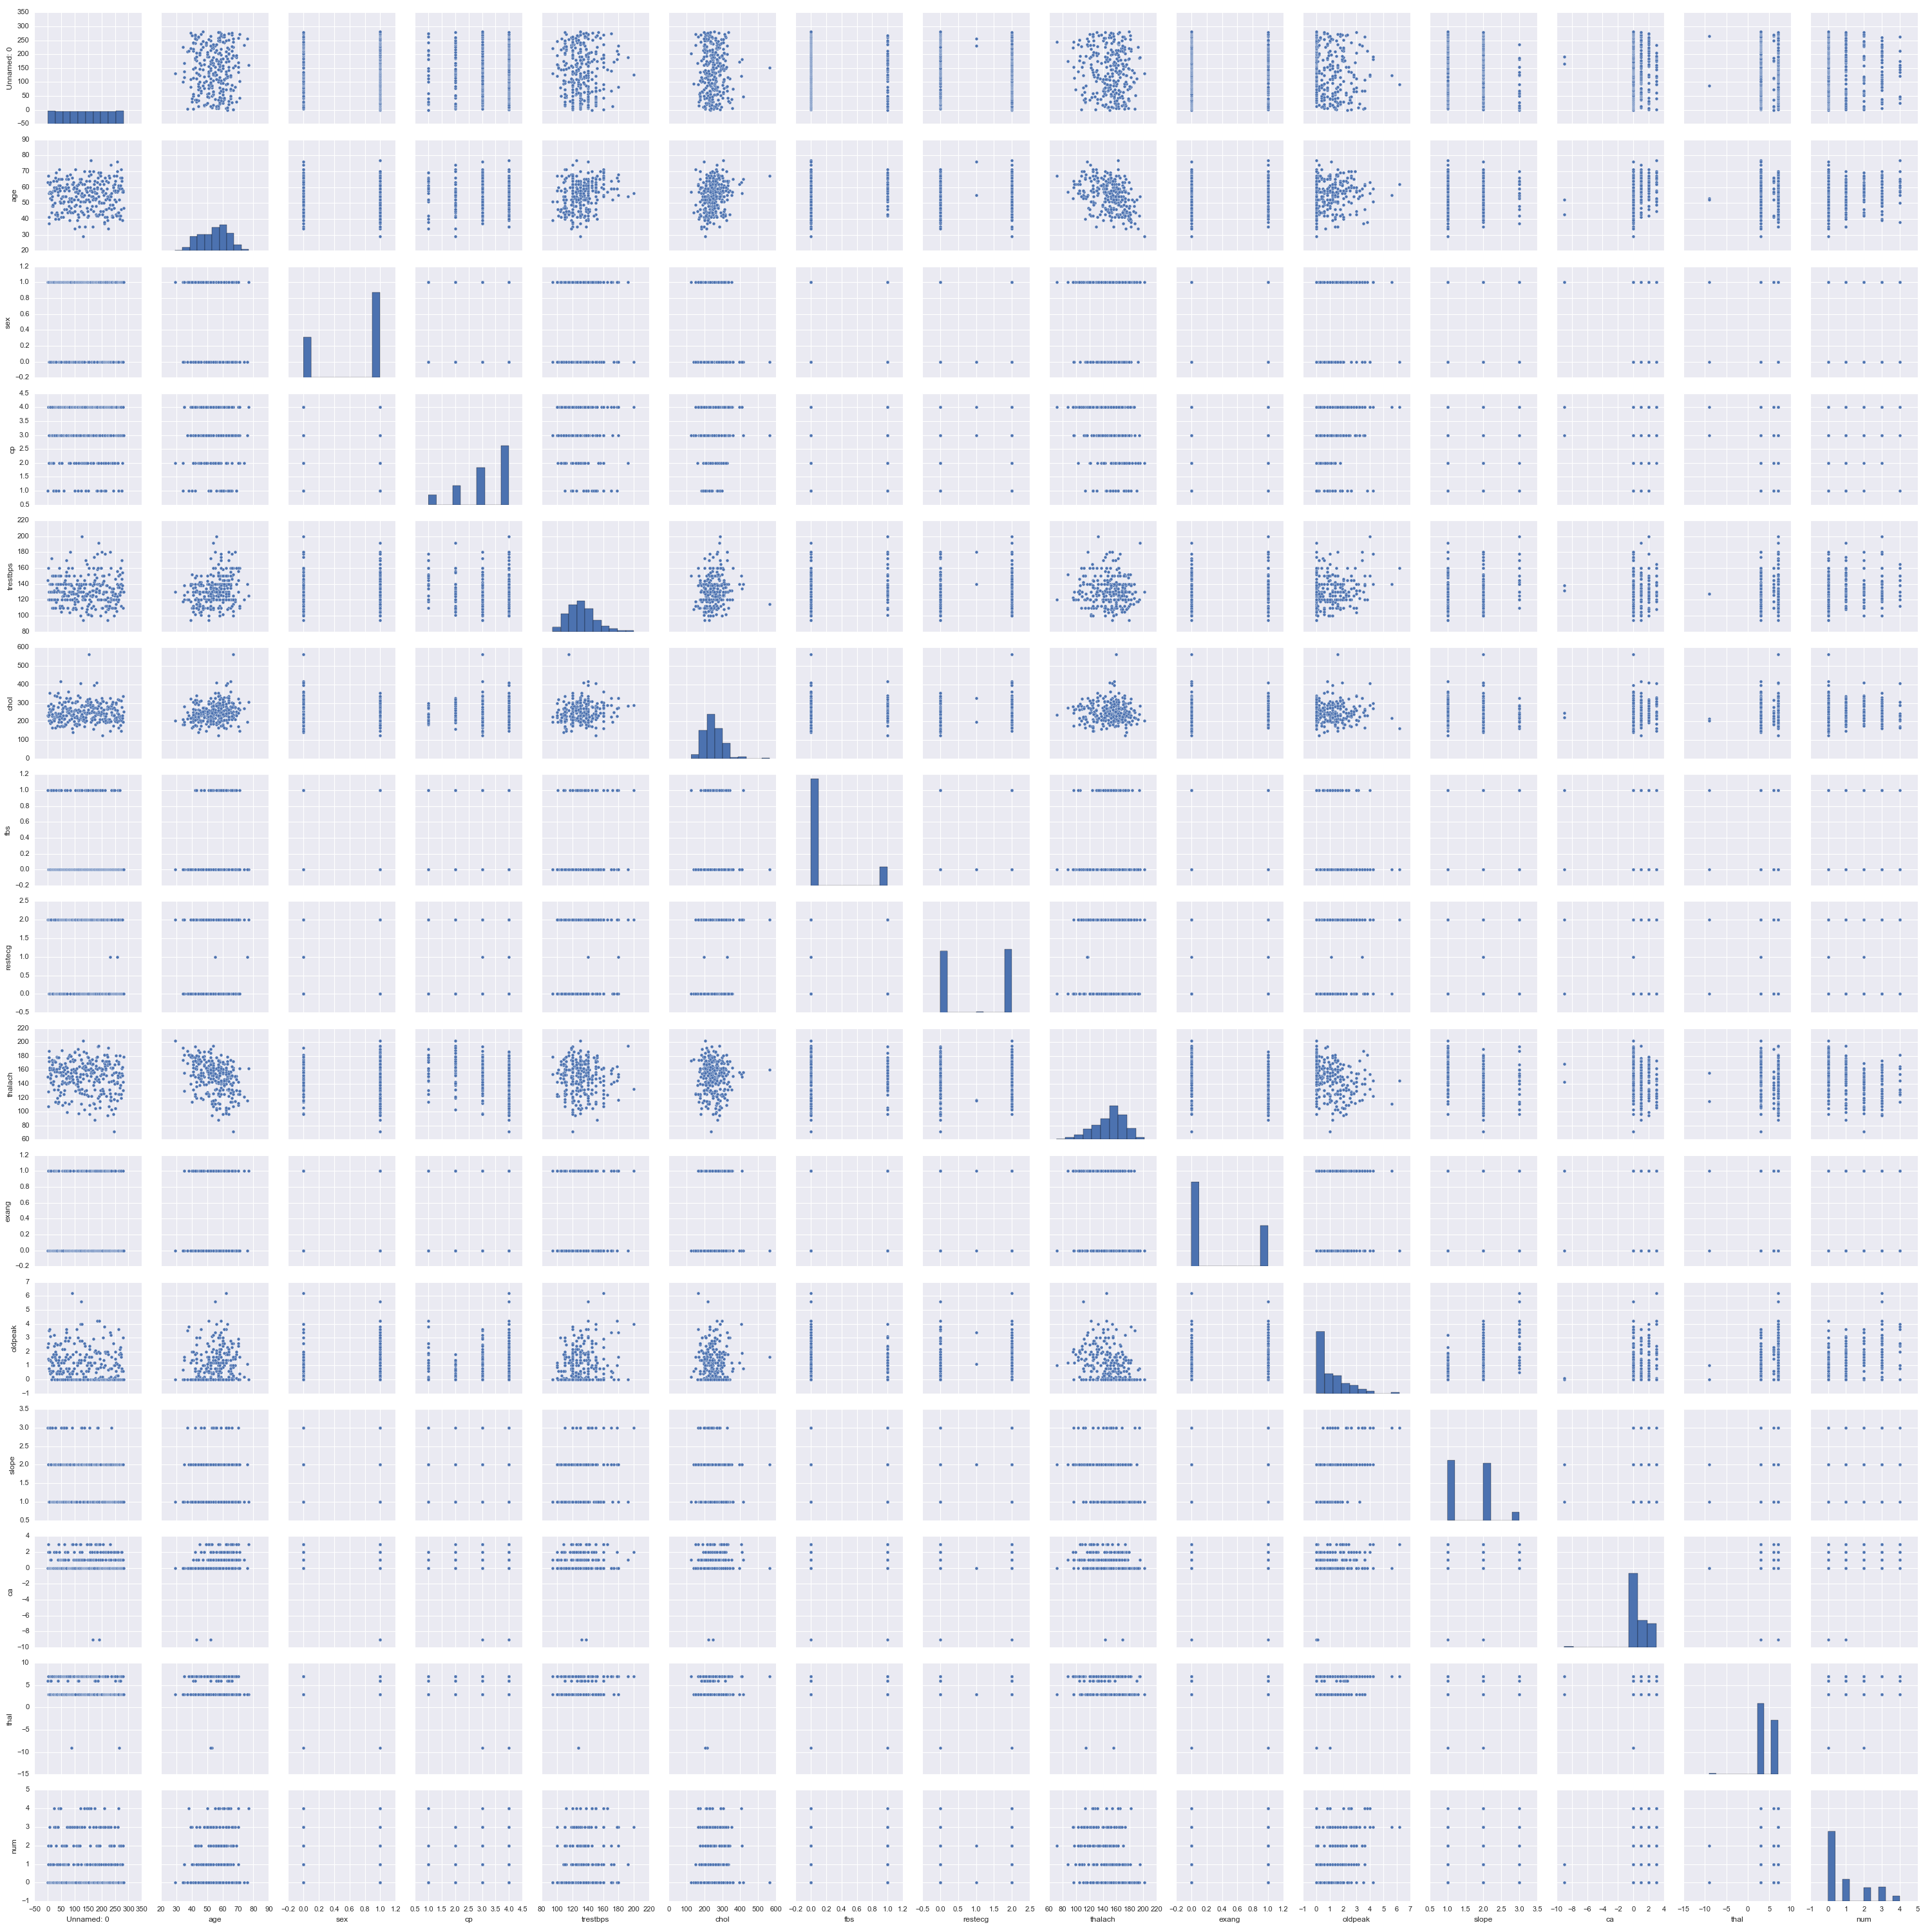

In [19]:
sns.pairplot(df)

In [ ]:
df.replace('-9', np.nan)
len(df)

In [ ]:
df2 = df.dropna(axis=0, how='any')

Cross-validated pipelines including scaling, we need to estimate mean and standard deviation separately for each fold.
To do that, we build a pipeline.

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [ ]:
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)
X_train_scaled = standard_scaler.transform(X_train)
svm = SVC().fit(X_train_scaled, y_train)

In [ ]:
X_test_scaled = standard_scaler.transform(X_test)
svm.predict(X_test)

In [ ]:
#pipeline = Pipeline([("scaler", StandardScaler()),
#                     ("svm", SVC())])
# short version:
pipeline = make_pipeline(StandardScaler(), SVC())

In [ ]:
pipeline.fit(X_train, y_train)

In [ ]:
pipeline.score(X_test, y_test)

In [ ]:
predicted = pipeline.predict(X_test)

In [ ]:
plt.hist(y_test)

In [ ]:
plt.hist(predicted)

Cross-validation with a pipeline
---------------------------------

In [ ]:
from sklearn.cross_validation import cross_val_score
cross_val_score(pipeline, X_train, y_train)

Grid Search with a pipeline
===========================

In [ ]:
import numpy as np
from sklearn.grid_search import GridSearchCV

param_grid = {'svc__C': 10. ** np.arange(-3, 3),
              'svc__gamma' : 10. ** np.arange(-3, 3)
             }

grid_pipeline = GridSearchCV(pipeline, param_grid=param_grid) 

In [ ]:
grid_pipeline.fit(X_train, y_train)

In [ ]:
grid_pipeline.score(X_train, y_train)

In [ ]:
# load data and split
df = pd.read_csv("/Users/shermanash/ds/metis/nyc16_ds6/04-mcnulty1/04-svms/cleveland_14.csv")
cols_we_like = [col for col in df.columns if col not in [['id','location','num']]]
# train test split
L_X = df[cols_we_like]
L_y = df.num

In [ ]:
# get score on longbeach set
grid_pipeline.score(L_X, L_y)

In [ ]:
grid_pipeline.best_params_

In [ ]:
pickle.dump( grid_pipeline, open( "cle_14_pipeline.p", "wb" ) )